In [31]:
pip install pylatexenc

  Using cached pylatexenc-2.10.tar.gz (162 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136819 sha256=95568d08d440f5c3e8164675a46bff6eeb341fc534c74c92cdb12a6cbb22c7b0
  Stored in directory: /Users/hema/Library/Caches/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 7.2 MB/s eta 0:00:00a 0:00:01
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.1 MB/s eta 0:00:0000:0100:01
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp311-cp311-macosx_10_9_x86_64.whl size=86092 sha256=cc2a341f2f4bfc29f6576fb8200ffd60fc3323e9892cf5abce80aedb42ea76f1
  Stored in directory: /Users/hema/Library/Caches/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.24.1
    Uninstalling qiskit-terra-0.24.1:
      Successfully uninstalled qiskit-terra-0.24.1
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.43.2
    Uninstalling qiskit-0.43.2:
      Successfully uninstalled qiskit-0

In [126]:
pip install qiskit-optimization

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

import os

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dmn_sc = pd.read_csv('adhd_dmn_sc_entropy.csv')

In [3]:
dmn_sc.head(2)

,ScanID,Age,DX,ADHD_Index,Inattentive,Hyper/Impulsive,Verbal_IQ,Performance_IQ,DMN_Entropy,SC_Entropy
0,2266806,11.25,0,21.0,9.0,12.0,128,123,-14.111010,-13.279223
1,2276801,13.00,3,37.0,24.0,13.0,124,92,-13.695441,-13.437690


In [4]:
dmn_sc.columns

Index(['ScanID', 'Age', 'DX', 'ADHD_Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal_IQ', 'Performance_IQ', 'DMN_Entropy', 'SC_Entropy'],
      dtype='object')

In [74]:
features = dmn_sc[['Age', 'ADHD_Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal_IQ', 'Performance_IQ', 'DMN_Entropy', 'SC_Entropy']]

labels = dmn_sc['DX'].values

In [75]:

labels

array([0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3])

In [76]:
features = MinMaxScaler().fit_transform(features)

In [77]:
#features

In [78]:
random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=random_seed
)


In [90]:
#train_labels['DX'] = train_labels['DX'].apply(lambda x: x if x==0 else 1)

In [91]:
train_features.shape

(34, 8)

In [81]:
svc = SVC()
_ = svc.fit(train_features, train_labels)

In [82]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 1.00
Classical SVC on the test dataset:     0.78


/Users/hema/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


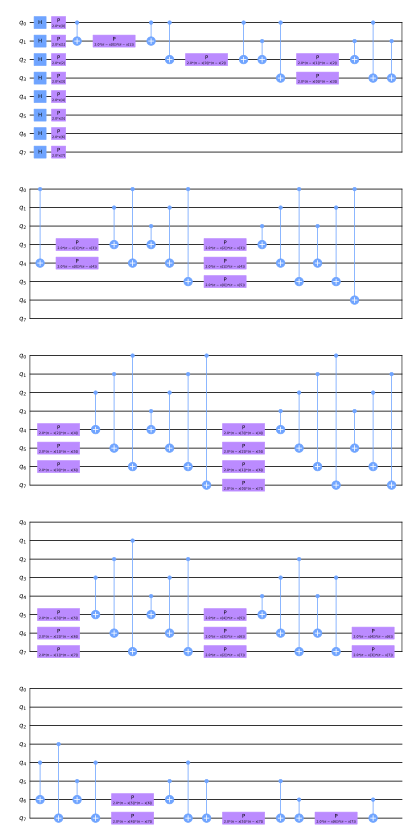

In [83]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20, scale=0.4)

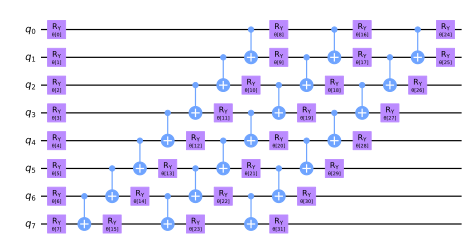

In [84]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20, scale=0.6)



In [99]:
from qiskit_optimization.algorithms import CobylaOptimizer, 

In [100]:
#from qiskit_algorithms.optimizers import COBYLA
optimizer = CobylaOptimizer()

In [87]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [88]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [101]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

AttributeError: 'CobylaOptimizer' object has no attribute 'minimize'

### QSVC

In [58]:
from sklearn.datasets import make_blobs


In [125]:
dmn_sc.head(5)

,ScanID,Age,DX,ADHD_Index,Inattentive,Hyper/Impulsive,Verbal_IQ,Performance_IQ,DMN_Entropy,SC_Entropy
0,2266806,11.25,0,21.0,9.0,12.0,128,123,-14.111010,-13.279223
1,2276801,13.00,3,37.0,24.0,13.0,124,92,-13.695441,-13.437690
2,2427408,14.08,0,24.0,12.0,12.0,128,101,-14.266481,-13.338497
3,2196753,10.33,3,44.0,26.0,18.0,97,103,-13.674281,-13.340344
4,2249443,12.00,0,32.0,15.0,17.0,113,111,-13.913288,-13.350803


In [119]:
features = dmn_sc[['Age', 'ADHD_Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal_IQ', 'Performance_IQ', 'DMN_Entropy', 'SC_Entropy']]

labels = dmn_sc['DX'].values
labels

array([0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3])

In [120]:
features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=15, shuffle=False
)

In [102]:
features_noent = dmn_sc[['Age', 'ADHD_Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal_IQ', 'Performance_IQ']]

labels = dmn_sc['DX'].values
labels

array([0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3])

In [104]:
features_noent = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features_noent)

train_features_noent, test_features_noent, train_labels, test_labels = train_test_split(
    features_noent, labels, train_size=15, shuffle=False
)

In [121]:
# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000



In [107]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

### QSVC with Entropy

In [70]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 0.9642857142857143


### QSVC without entropy measure

In [108]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features_noent, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features_noent, test_labels)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 0.9285714285714286


### sklearn SVC without entropy

In [109]:
from sklearn import svm

In [110]:
clf = svm.SVC(kernel='linear', C = 1.0)

In [111]:
clf.fit(train_features_noent, train_labels)

SVC(kernel='linear')

In [115]:
predictions = (clf.predict(test_features_noent))

In [116]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predictions)

0.9642857142857143

### sklearn SVC with entropy

In [122]:
clf.fit(train_features, train_labels)

SVC(kernel='linear')

In [123]:
accuracy_score(test_labels, clf.predict(test_features))

1.0

In [71]:
grid_step = 0.2
margin = 0.2
grid_x, grid_y = np.meshgrid(
    np.arange(-margin, np.pi + margin, grid_step), np.arange(-margin, np.pi + margin, grid_step)
)


In [73]:
#meshgrid_features = np.column_stack((grid_x.ravel(), grid_y.ravel()))
#meshgrid_colors = pegasos_qsvc.predict(meshgrid_features)


ValueError: x_vec and y_vec have incompatible dimensions.
x_vec has 2 dimensions, but y_vec has 8.